In [8]:
# Cargar y concatenar todos los CSV de la carpeta en un solo DataFrame
import glob
import os
import sys
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
csv_files = glob.glob(os.path.join('.', '*.csv'))
print(f"Encontrados {len(csv_files)} archivos CSV en la carpeta:")
for f in csv_files:
    print(' -', f)

if len(csv_files) == 0:
    print('No hay archivos CSV en la carpeta actual.')
else:
    dfs = []
    for f in csv_files:
        try:
            df = pd.read_csv(f)
        except Exception as e:
            print(f"Error leyendo {f}: {e}")
            continue
        # Añadir columna con nombre de archivo sin extensión para rastrear origen
        df['archivo_origen'] = os.path.splitext(os.path.basename(f))[0]
        dfs.append(df)

    # Concatenar todos los DataFrames
    data = pd.concat(dfs, ignore_index=False)

    data['Timestamp'] = pd.to_datetime(data['Timestamp'], errors='coerce')
    data.sort_values(by='Timestamp', inplace=True)

    # 3. (Opcional) Resetear el índice después de ordenar
    data.reset_index(drop=True, inplace=True)
    data = data[data['Level_pct'] != 0]

    # Intentar convertir columna Timestamp si existe
    if 'Timestamp' in data.columns:
        try:
            data['Timestamp'] = pd.to_datetime(data['Timestamp'])
        except Exception as e:
            print('No se pudo convertir "Timestamp" a datetime:', e)

    print('\nData combinada creada:')
    print(f"Filas: {data.shape[0]}, Columnas: {data.shape[1]}")
    display(data.head())
    display(df.tail())
    # Guardar en variable global `data` para compatibilidad con celdas existentes
    # Si prefieres otro nombre, dime cuál y lo cambio.

Encontrados 2 archivos CSV en la carpeta:
 - .\manual_perturbation_50pct_control_100pct.csv
 - .\manual_perturbation_50pct_control_90pct.csv

Data combinada creada:
Filas: 60523, Columnas: 15


,Timestamp,Valve_Closure_pct,Level_pct,Is_Real_Measurement,Control_Signal_pct,Setpoint_pct,Error_pct,Kp,Ki,Kd,b1,a1,a2,perturbation,archivo_origen
2,2025-07-29 09:41:35,0,3.529412,1,100.000000,10,6.470588,-7.046465,64.375425,4.011023,0.046441,0.901699,0.126362,0,manual_perturbation_50pct_control_100pct
3,2025-07-29 09:41:36,0,7.058824,1,84.195183,10,2.941176,4.861796,30.245885,51.327160,0.046441,-1.052587,0.128034,0,manual_perturbation_50pct_control_100pct
4,2025-07-29 09:41:37,0,7.843137,1,100.000000,10,2.156863,-8.207391,9.208829,9.629711,0.046450,-1.052389,1.198643,0,manual_perturbation_50pct_control_100pct
5,2025-07-29 09:41:38,0,12.549020,1,69.997019,10,-2.549020,9.303226,-24.959562,-1236.391009,0.049165,-0.410712,-0.601429,0,manual_perturbation_50pct_control_100pct
6,2025-07-29 09:41:39,0,14.509804,1,42.504719,10,-4.509804,9.050430,-23.545094,1879.684513,0.050483,-0.372688,-0.619552,0,manual_perturbation_50pct_control_100pct


,Timestamp,Valve_Closure_pct,Level_pct,Is_Real_Measurement,Control_Signal_pct,Setpoint_pct,Error_pct,Kp,Ki,Kd,b1,a1,a2,perturbation,archivo_origen
30595,2025-08-05 17:43:12,90,62.745098,1,100.0,90,27.254902,-0.189427,0.572573,0.069728,0.730879,0.165243,0.161582,0,manual_perturbation_50pct_control_90pct
30596,2025-08-05 17:43:13,90,63.137255,1,100.0,90,26.862745,-0.166398,0.504515,0.054618,0.716859,0.143225,0.138788,0,manual_perturbation_50pct_control_90pct
30597,2025-08-05 17:43:14,90,63.137255,1,100.0,90,26.862745,-0.146630,0.444395,0.042975,0.705058,0.124033,0.120336,0,manual_perturbation_50pct_control_90pct
30598,2025-08-05 17:43:15,90,0.000000,1,100.0,90,90.000000,-0.255900,0.771661,0.122179,0.776765,0.236140,0.232540,0,manual_perturbation_50pct_control_90pct
30599,2025-08-05 17:43:16,90,63.137255,1,100.0,90,26.862745,-0.256087,0.773558,0.122377,0.777522,0.237346,0.232536,0,manual_perturbation_50pct_control_90pct


Directorio de resultados ya existe: EDA_Resultados
--- 1. Feature Definition ---

¡Análisis EDA completado!
Los resultados se han guardado en la carpeta: c:\Users\cubap\OneDrive\Documentos\Procesamiento tanque\Todos los datos\Salida para pertubar\outflow decrease\EDA_Resultados
Informe de texto: EDA_Resultados\eda_report.txt


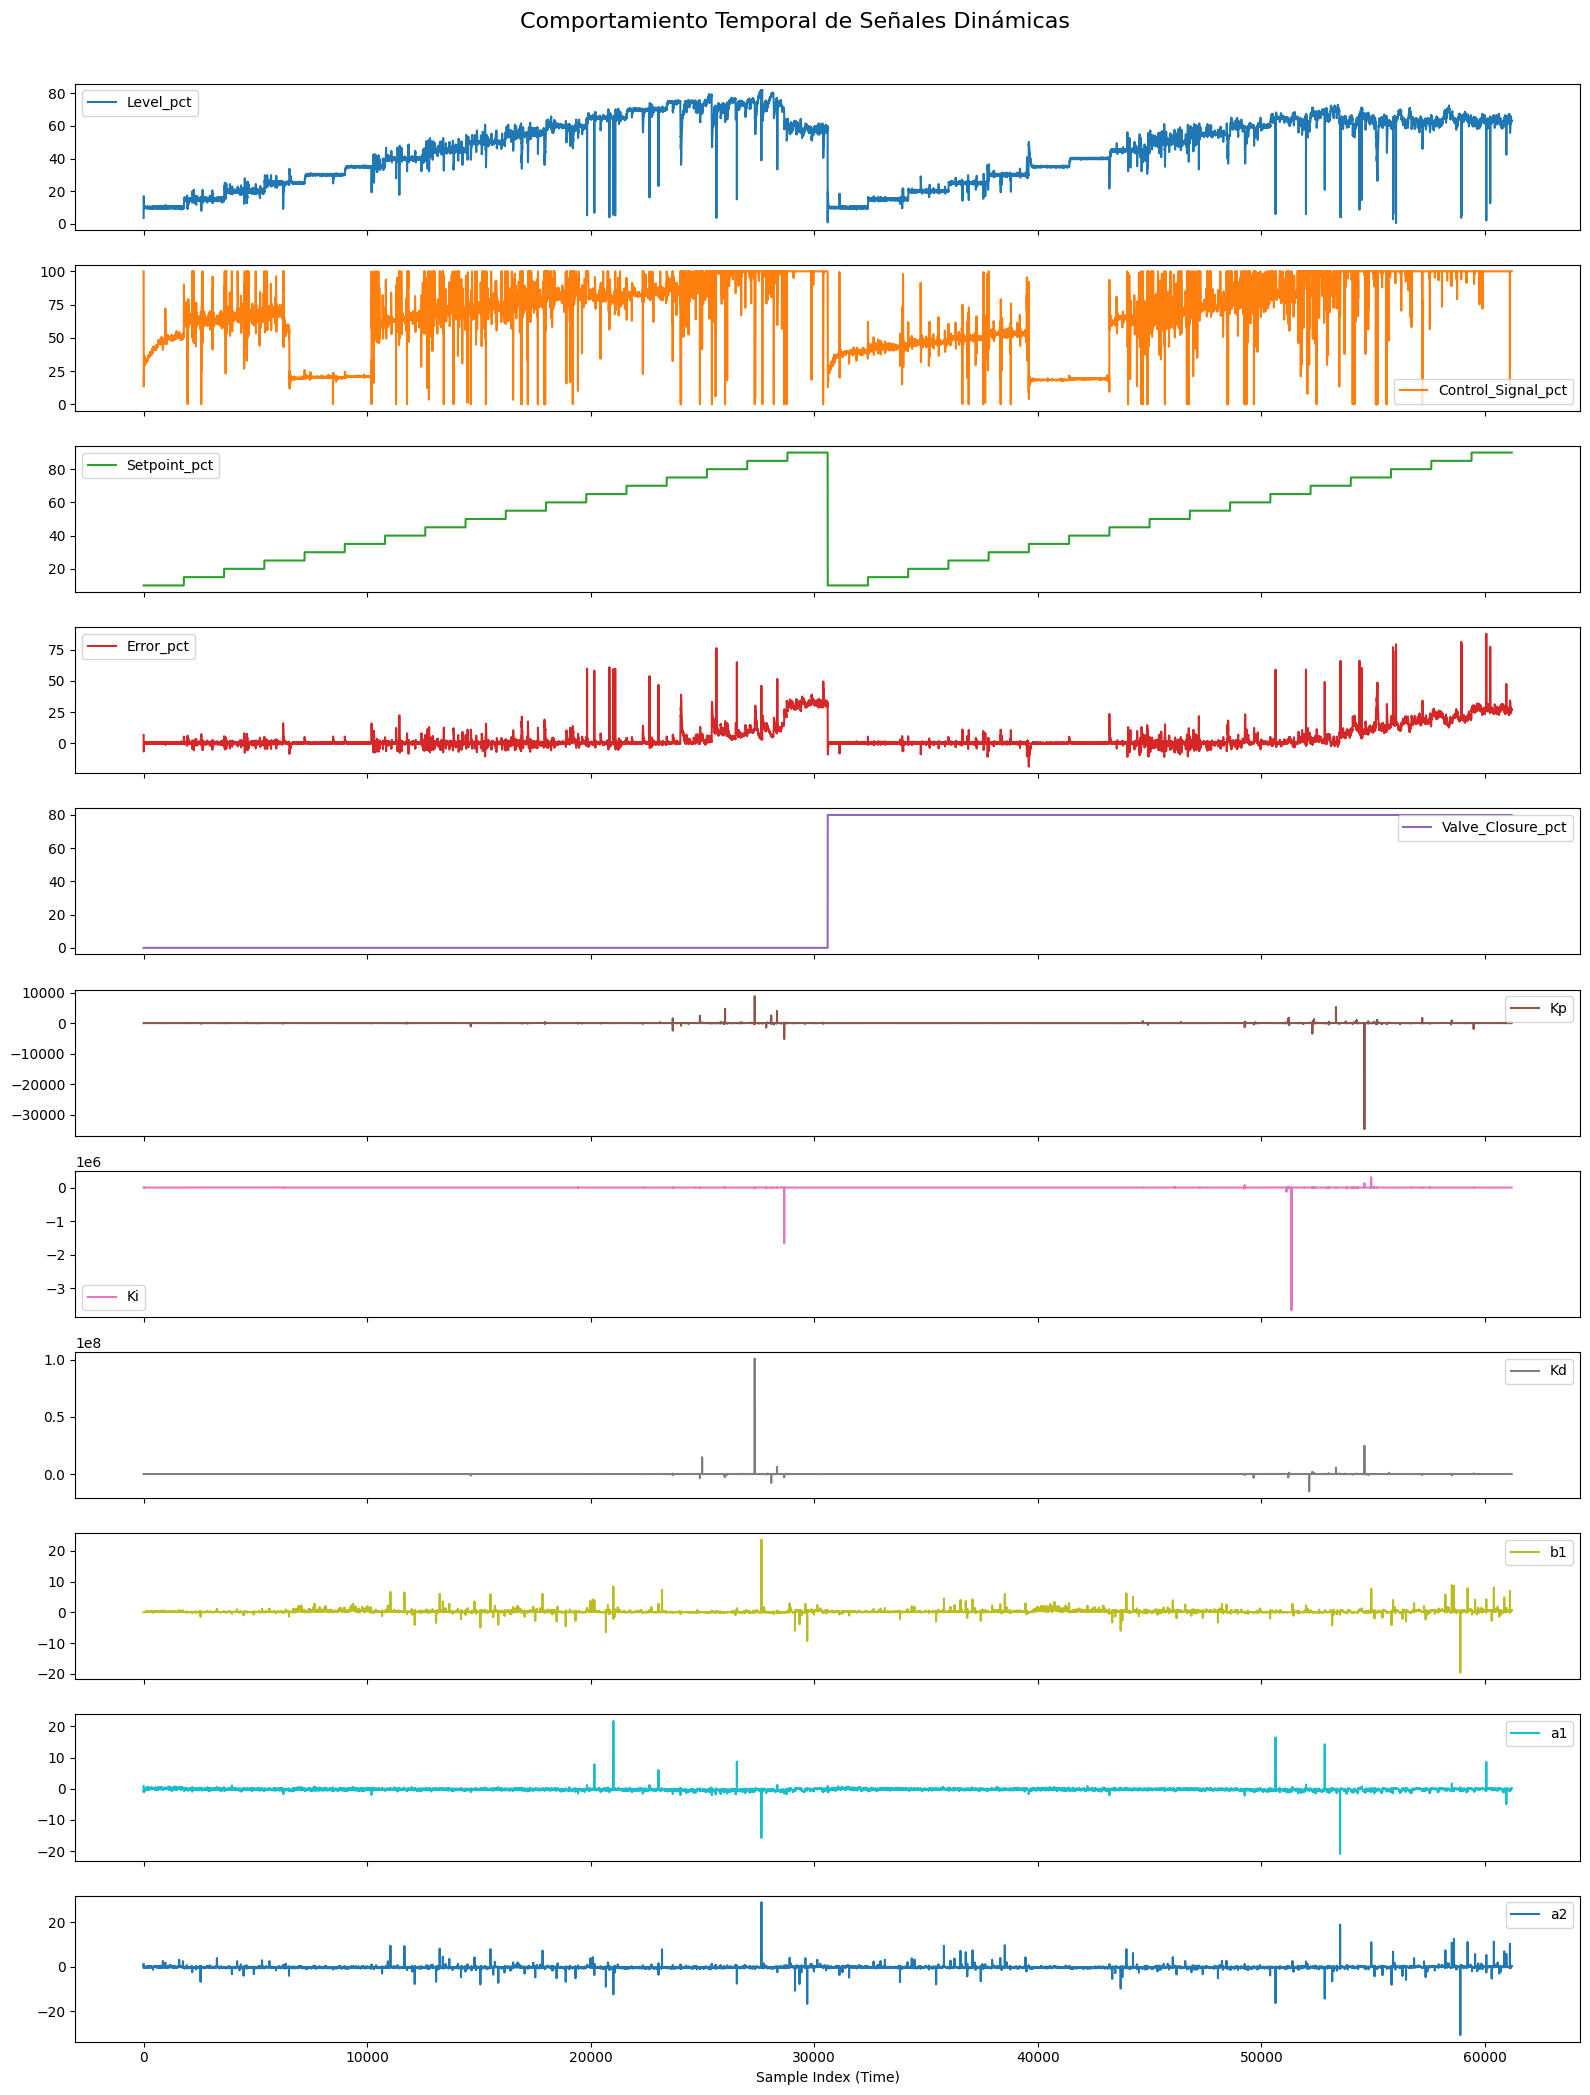

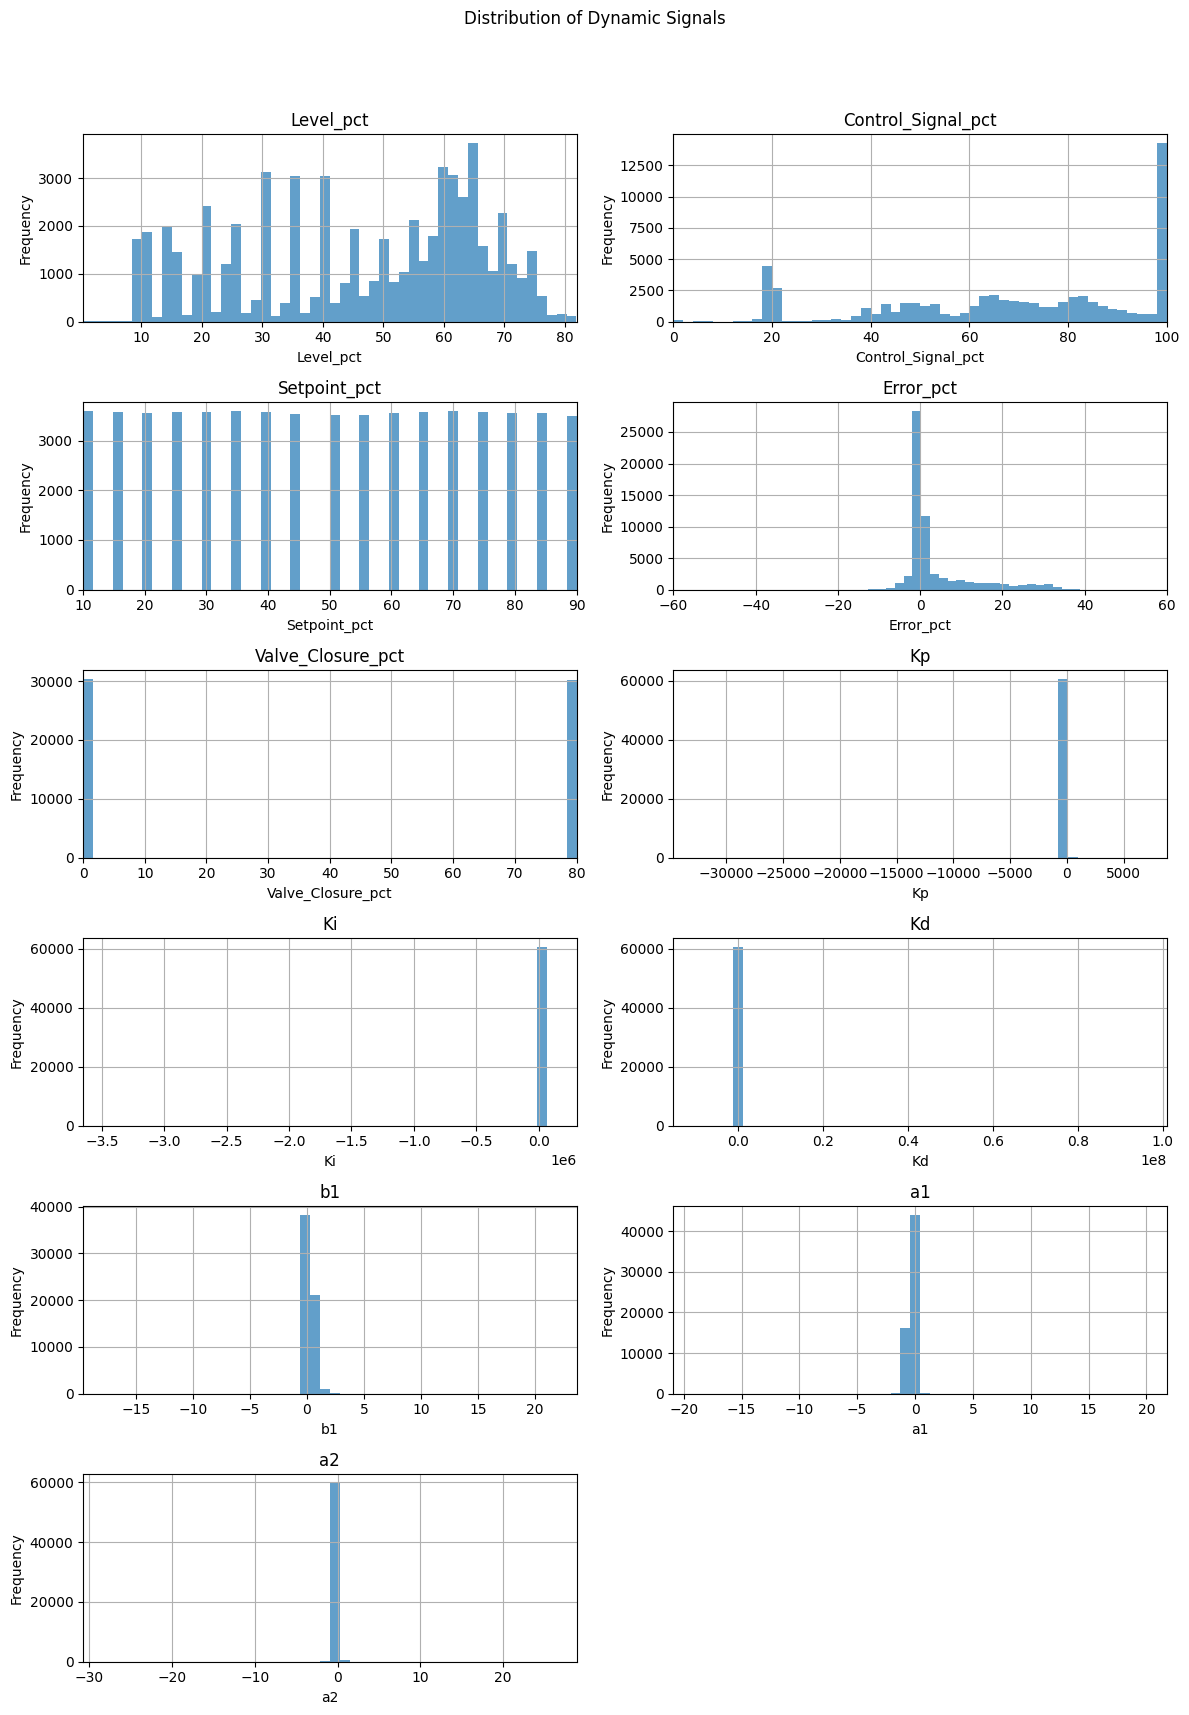

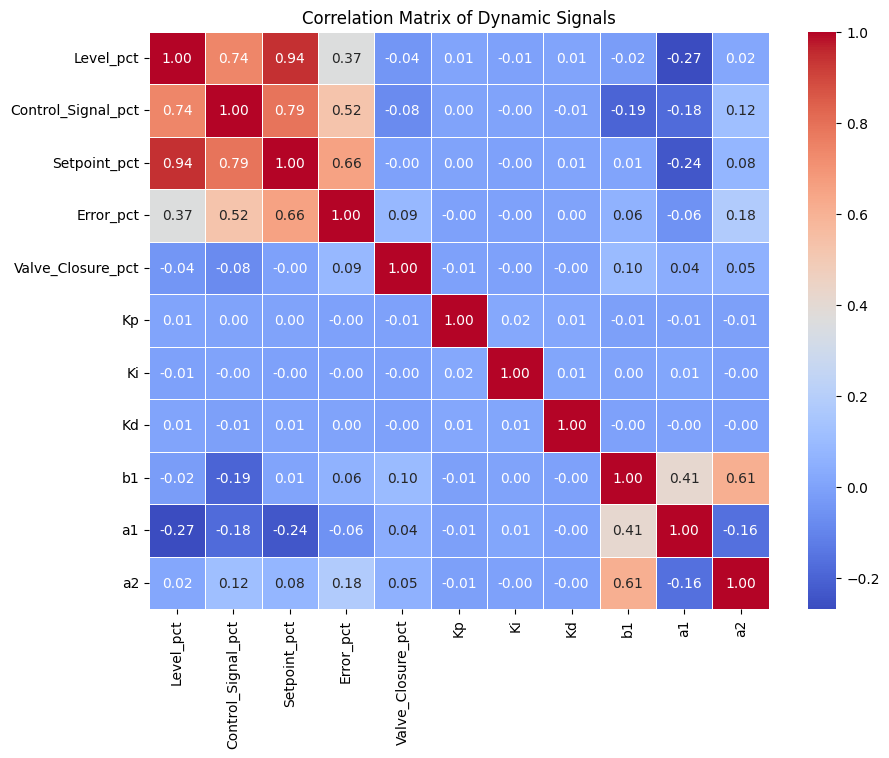

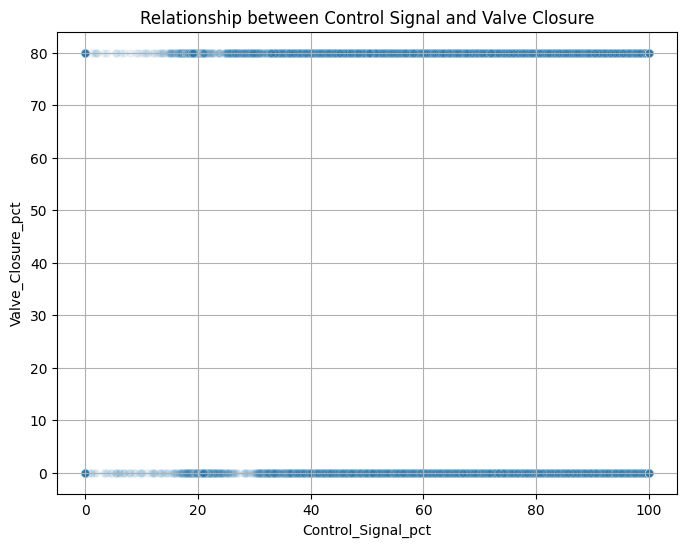

In [9]:
output_dir = "EDA_Resultados"
if not os.path.exists(output_dir):
    os.makedirs(output_dir)
    print(f"Directorio creado: {output_dir}")
else:
    print(f"Directorio de resultados ya existe: {output_dir}")
# Restar 10 a 'Valve_Closure_pct' y asegurar que no sea negativo (clip)
if 'Valve_Closure_pct' in data.columns:
    # Usamos clip(lower=0) para evitar valores negativos
    data['Valve_Closure_pct'] = (data['Valve_Closure_pct'] - 10).clip(lower=0)
else:
    print("Advertencia: No se encontró la columna 'Valve_Closure_pct' para restarle 10.")


# --- 2. Definición de Features y Preparación ---
print("--- 1. Feature Definition ---")
# Todas las variables se tratan como dinámicas
dynamic_features = [
    'Level_pct', 'Control_Signal_pct', 'Setpoint_pct', 'Error_pct', 
    'Valve_Closure_pct', 'Kp', 'Ki', 'Kd', 'b1', 'a1', 'a2'
]

# Filtrar la lista para incluir solo columnas que SÍ existen en el DataFrame
available_features = [col for col in dynamic_features if col in data.columns]
missing_features = [col for col in dynamic_features if col not in data.columns]

if missing_features:
    print(f"Advertencia: Las siguientes columnas no se encontraron y serán ignoradas: {missing_features}")

# Asegurarse de que las features dinámicas son numéricas
data[available_features] = data[available_features].apply(pd.to_numeric, errors='coerce')


# --- 3. Redirección de Salida de Texto ---
# Todo lo que se imprima de aquí en adelante irá al archivo 'eda_report.txt'
output_txt_file = os.path.join(output_dir, 'eda_report.txt')
original_stdout = sys.stdout  # Guardar la salida estándar original

try:
    with open(output_txt_file, 'w', encoding='utf-8') as f:
        sys.stdout = f  # Redirigir stdout al archivo

        print("--- INFORME DE ANÁLISIS EXPLORATORIO DE DATOS (EDA) ---")
        print(f"Fecha de generación: {pd.Timestamp.now()}")
        print(f"Directorio de resultados: {os.path.abspath(output_dir)}")
        print("="*50)
        
        print(f"\nColumnas analizadas como dinámicas: {available_features}")
        if missing_features:
            print(f"Columnas ignoradas (no encontradas): {missing_features}")

        # --- 2. Data Quality and Statistics Analysis ---
        print("\n--- 2. Calidad de Datos (Nulos) ---")
        print("Conteo de valores nulos por columna:")
        print(data.isnull().sum())

        print("\n--- Estadísticas Descriptivas (Señales Dinámicas) ---")
        # .to_string() asegura que se imprima el DataFrame completo
        print(data[available_features].describe().to_string())

        # --- 5. Dynamic Signal Analysis (The "Process") ---
        print("\n--- 5. Análisis de Señales Dinámicas ---")
        
        # --- 5.1. Behavior over Time ---
        img_path_1 = os.path.join(output_dir, 'eda_plot_01_time_behavior.png')
        print(f"Plotting temporal behavior... -> '{img_path_1}'")
        try:
            plot_layout = (len(available_features), 1)
            # Ajustar altura: 2 pulgadas por subplot, mínimo 12
            fig_height = max(12, len(available_features) * 2) 
            
            axes = data.plot(y=available_features, 
                           subplots=True, 
                           figsize=(16, fig_height),
                           layout=plot_layout,
                           title='Behavior of Dynamic Signals')
            
            # Aplanar los ejes para acceder al último
            flat_axes = axes.flatten()
            flat_axes[-1].set_xlabel('Sample Index (Time)')
            
            plt.suptitle('Comportamiento Temporal de Señales Dinámicas', fontsize=16)
            plt.tight_layout(rect=[0, 0.03, 1, 0.97]) # Ajustar para el suptitle
            plt.savefig(img_path_1, bbox_inches='tight')
            #plt.close() # Cerrar la figura para liberar memoria
            print("Gráfico 1 guardado.")
        except Exception as e:
            print(f"Error al guardar Gráfico 1 (Behavior): {e}")


        # --- 5.2. Distributions ---
        img_path_2 = os.path.join(output_dir, 'eda_plot_02_distributions.png')
        print(f"Plotting distributions... -> '{img_path_2}'")
        try:
            # Layout de 2 columnas: calcular número de filas necesarias
            n_cols = 2
            n_rows = (len(available_features) + 1) // 2  # redondear hacia arriba
            fig_height = max(10, n_rows * 3)  # 3 pulgadas por fila
            
            axes = data[available_features].hist(bins=50, figsize=(12, fig_height), alpha=0.7, layout=(n_rows, n_cols))
            
            # Ajustar límites del eje x al rango de los datos para cada subplot y agregar labels en inglés
            flat_axes = axes.flatten()
            for i, col in enumerate(available_features):
                if i < len(flat_axes):
                    col_data = data[col].dropna()
                    flat_axes[i].set_xlabel(col)
                    flat_axes[i].set_ylabel('Frequency')
                    if col == 'Error_pct':
                        flat_axes[i].set_xlim(-60, 60)
                    elif len(col_data) > 0:
                        flat_axes[i].set_xlim(col_data.min(), col_data.max())
            
            plt.suptitle('Distribution of Dynamic Signals')
            plt.tight_layout(rect=[0, 0.03, 1, 0.95])
            plt.savefig(img_path_2, bbox_inches='tight')
            #plt.close()
            print("Plot 2 guardado.")
        except Exception as e:
            print(f"Error al guardar Gráfico 2 (Distributions): {e}")

        # --- 5.3. Correlation Matrix ---
        img_path_3 = os.path.join(output_dir, 'eda_plot_03_correlation_matrix.png')
        print(f"Calculating correlation matrix... -> '{img_path_3}'")
        try:
            # Ajustar tamaño basado en número de features
            fig_size = max(10, len(available_features) * 0.8) 
            plt.figure(figsize=(fig_size, fig_size * 0.75))
            
            corr_matrix = data[available_features].corr()
            sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
            plt.title('Correlation Matrix of Dynamic Signals')
            plt.savefig(img_path_3, bbox_inches='tight')
            #plt.close()
            print("Gráfico 3 guardado.")
        except Exception as e:
            print(f"Error al guardar Gráfico 3 (Correlation): {e}")

        # --- 6. (HIGHLY RECOMMENDED) Coherence Checks ---
        print("\n--- 6. Verificaciones de Coherencia ---")

        # --- 6.1. Is 'Error_pct' (Setpoint - Level)? ---
        if 'Error_pct' in data.columns and 'Setpoint_pct' in data.columns and 'Level_pct' in data.columns:
            data['Calculated_Error'] = data['Setpoint_pct'] - data['Level_pct']
            error_diff = (data['Error_pct'] - data['Calculated_Error']).abs().sum()
            
            if error_diff < 1e-5: # Usar tolerancia por errores de punto flotante
                print("Coherencia (6.1): 'Error_pct' SÍ es (Setpoint_pct - Level_pct). ¡Bien!")
            else:
                print("¡Atención (6.1)! 'Error_pct' NO coincide con (Setpoint_pct - Level_pct).")
                print(f"Suma de la diferencia absoluta: {error_diff}")
                
                img_path_4 = os.path.join(output_dir, 'eda_plot_04_error_difference.png')
                print(f"Plotting error difference... -> '{img_path_4}'")
                try:
                    plt.figure(figsize=(12, 3))
                    (data['Error_pct'] - data['Calculated_Error']).plot(title='Difference between Error_pct and (SP - LV)')
                    plt.ylabel("Diferencia")
                    plt.xlabel("Sample Index")
                    plt.grid(True)
                    plt.savefig(img_path_4, bbox_inches='tight')
                    #plt.close()
                    print("Gráfico 4 (Error Diff) guardado.")
                except Exception as e:
                    print(f"Error al guardar Gráfico 4 (Error Diff): {e}")
            
            # Clean up temporary column
            data = data.drop(columns=['Calculated_Error'])
        else:
            print("No se pudo realizar la verificación de coherencia 6.1 (faltan columnas).")


        # --- 6.2. How are Control_Signal_pct and Valve_Closure_pct related? ---
        if 'Control_Signal_pct' in data.columns and 'Valve_Closure_pct' in data.columns:
            img_path_5 = os.path.join(output_dir, 'eda_plot_05_control_vs_valve.png')
            print(f"Plotting Control vs Valve relationship... -> '{img_path_5}'")
            try:
                plt.figure(figsize=(8, 6))
                sns.scatterplot(data=data, x='Control_Signal_pct', y='Valve_Closure_pct', alpha=0.1)
                plt.title('Relationship between Control Signal and Valve Closure')
                plt.grid(True)
                plt.savefig(img_path_5, bbox_inches='tight')
                #plt.close()
                print("Gráfico 5 (Control vs Valve) guardado.")
            except Exception as e:
                print(f"Error al guardar Gráfico 5 (Control vs Valve): {e}")
        else:
            print("No se pudo realizar la verificación de coherencia 6.2 (faltan columnas).")

        print("\n--- FIN DEL INFORME EDA ---")

finally:
    # Restaurar la salida estándar original para poder ver los prints finales
    sys.stdout = original_stdout

print(f"\n¡Análisis EDA completado!")
print(f"Los resultados se han guardado en la carpeta: {os.path.abspath(output_dir)}")
print(f"Informe de texto: {output_txt_file}")